In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the CSV file with dates and tickers
filename = 'data/S&P 500 Historical Components & Changes(12-30-2023).csv'
df = pd.read_csv(filename, index_col='date')

historical_data_dict = {}

# Specify the start and end years
start_year = 2018
end_year = 2023

# Loop through each date and its associated tickers
# Iterate over the last row to get the tickers
for date, tickers in df.tail(1).iterrows():
    tickers_list = tickers['tickers'].split(',')
    tickers_list.append('^GSPC')  
    for ticker in tickers_list:
        # Ensure every year is initialized for the ticker
        if ticker not in historical_data_dict:
            historical_data_dict[ticker] = {str(year): None for year in range(start_year, end_year + 1)}
        for year in range(start_year, end_year + 1):
            try:
                # Download data for the start and end of each year from 2020 to 2025
                for year in range(start_year, end_year + 1):
                    start_date = f"{year}-01-01"
                    end_date = f"{year}-12-31"
                    historical_data = yf.Ticker(ticker).history(
            interval='1mo', start=start_date, end=end_date)['Close']   
                    
                    print(f"Downloaded data for {ticker} in {year}")

                    if not historical_data.empty and len(historical_data) >= 12:
                        # Calculate the percentage change from the first to the last month
                        first_price = historical_data.iloc[0]
                        last_price = historical_data.iloc[-1]  # Assuming the last index is December
                        percentage_change = ((last_price - first_price) / first_price) * 100
                        historical_data_dict[ticker][str(year)] = percentage_change
                    else:
                        print(f"Not enough data for {ticker} in {year}")

            except Exception as e:
                print(f"Error fetching data for {ticker}: {e}")
                historical_data_dict[ticker][str(year)] = None
                continue

print(historical_data_dict)


In [33]:
# Creating the DataFrame from the dictionary
df_final = pd.DataFrame.from_dict(historical_data_dict, orient='index')
df_final.reset_index(inplace=True)
df_final.rename(columns={'index': 'Ticker'}, inplace=True)

"""
--------------------------------------------------------------------- 
Ticker | 2020   | 2021   | 2022   | 2023
AAPL   | 134.15 | 134.15 | 134.15 | 138.45
TSLA   | 103.95 | 103.95 | 103.95 | 103.56
MSFT   | 162.55 | 162.55 | 162.55 | 162.55       
GOOGL  | 180.65 | 180.65 | 180.65 | 180.65

--------------------------------------------------------------------- 
columns: ['Ticker', '2020', '2021', '2022', '2023']
rows: [top 25 performing stocks + GSPC (S&P 500)]
"""

"\n--------------------------------------------------------------------- \nTicker | 2020   | 2021   | 2022   | 2023\nAAPL   | 134.15 | 134.15 | 134.15 | 138.45\nTSLA   | 103.95 | 103.95 | 103.95 | 103.56\nMSFT   | 162.55 | 162.55 | 162.55 | 162.55       \nGOOGL  | 180.65 | 180.65 | 180.65 | 180.65\n\n--------------------------------------------------------------------- \ncolumns: ['Ticker', '2020', '2021', '2022', '2023']\nrows: [top 25 performing stocks + GSPC (S&P 500)]\n"

In [ ]:
# Reordering DataFrame columns to match your format
years = [str(year) for year in range(start_year, end_year + 1)]
df_final = df_final[['Ticker'] + years]

print(df_final)


In [35]:
# Save the combined data to a CSV file or process it as needed
df_final.to_csv('stock_analysis.csv')

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
top25_per_year = {}
years = [str(year) for year in range(2020, 2024)]  # Adjust range as necessary

for year in years:
    # Sort and select top 25, excluding '^GSPC'
    top25 = df_final[df_final['Ticker'] != '^GSPC'].sort_values(by=year, ascending=False).head(25)
    top25_per_year[year] = top25


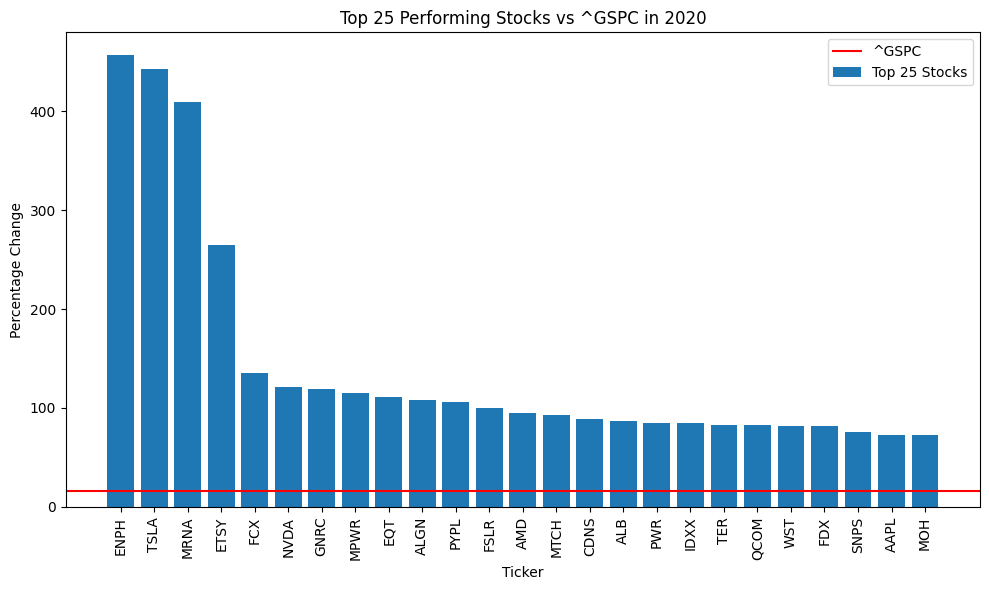

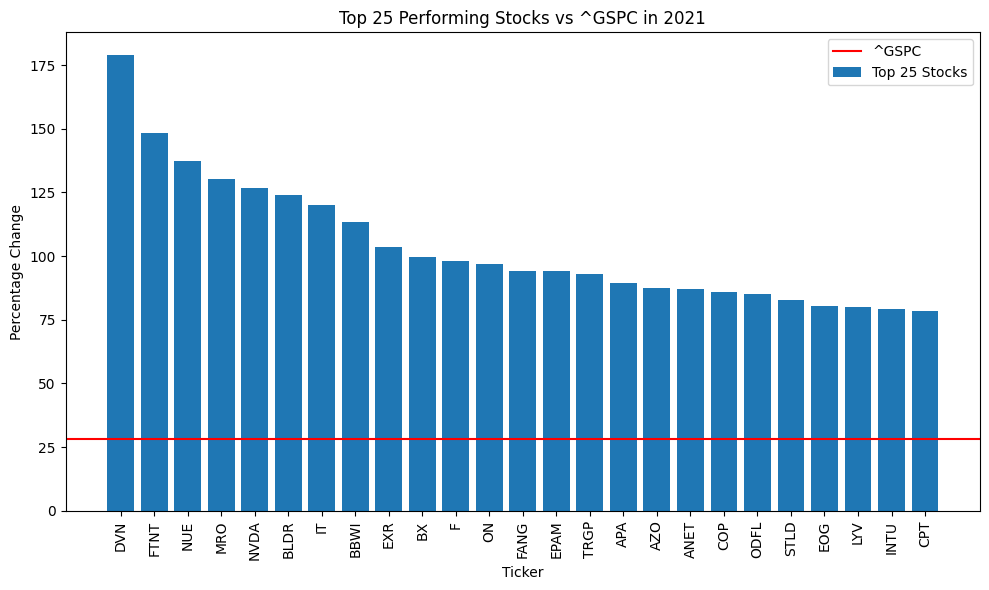

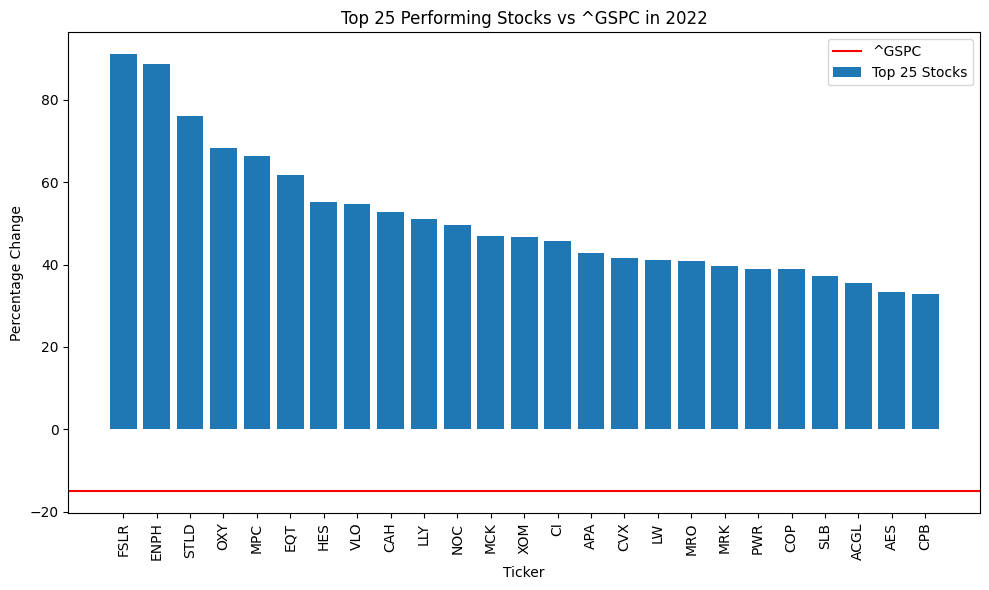

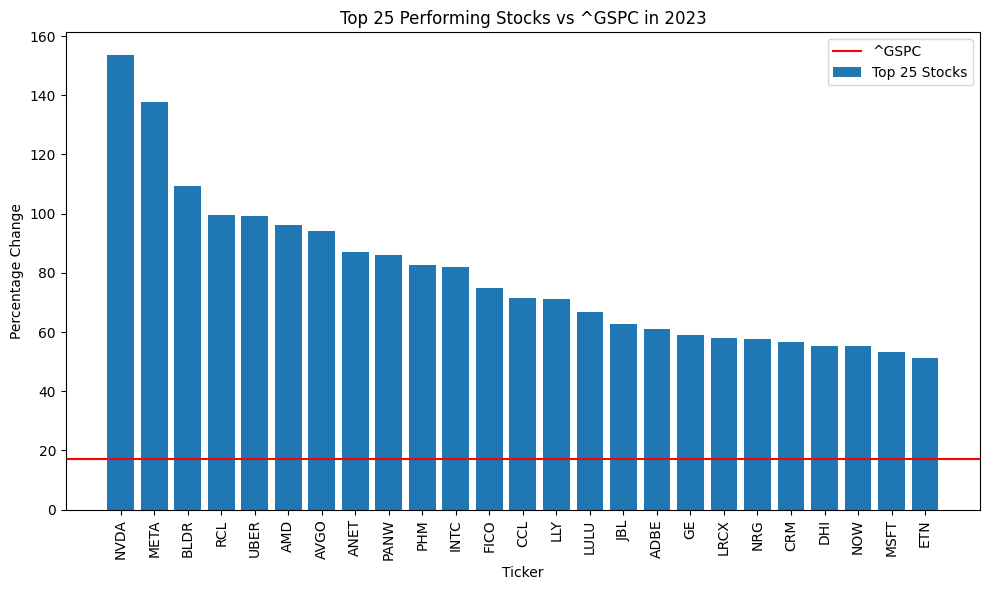

In [38]:

# Assuming `'^GSPC'` performance is stored in `df_final`
gspc_performance = df_final[df_final['Ticker'] == '^GSPC']

for year in years:
    top25 = top25_per_year[year]
    plt.figure(figsize=(10, 6))
    
    # Plot each of the top 25 stocks
    plt.bar(top25['Ticker'], top25[year], label='Top 25 Stocks')
    
    # Plot '^GSPC' for comparison
    plt.axhline(y=gspc_performance[year].values[0], color='r', linestyle='-', label='^GSPC')
    
    plt.xlabel('Ticker')
    plt.ylabel('Percentage Change')
    plt.title(f'Top 25 Performing Stocks vs ^GSPC in {year}')
    plt.xticks(rotation=90)  # Rotate tick labels for better readability
    plt.legend()
    plt.tight_layout()
    plt.show()
